a) Importance of nouns for GELECTRA 

b) Importance of Question-Words

c) Difference between start and end tokens

d) No significant NER differences for different questiont types

e) Investigate Wo-Fragen, just for the sacke of wo == LOC/GEL theory


# Which NER ist most interesting for GELECTRA?

## Initialize Settings

In [1]:
%cd ..

C:\Users\Stefan.Beuchert\Desktop\backup_from_kubectl


In [2]:
# requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.analyzer import get_frequencies_as_data_frame_in_comparison_to_expected_frequencies
from src.get_data import enhance_data_with_question_type

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Stefan.Beuchert\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stefan.Beuchert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# config
number_of_features = 10 # the default value
number_of_samples = 5000 # the default value

source_path_for_data = f'data/Data_Preparation/lime_ns_{number_of_samples}_nf_{number_of_features}_after_frequency_analysis.json'

# list of possible POS tags
NER_tag_list = ['',
               'LOC',
               'PER',
               'MISC',
               'ORG']

## Important info
The entetie labels 'LOC', 'PER', 'MISC and 'ORG' are the only labels available in the 'de_core_news_xy' data set. No matter if it's small, medium or large

In [4]:
# load data
data_df = pd.read_json(source_path_for_data)
data_df['explanation'] = [pd.DataFrame(exp) for exp in data_df['explanation'].tolist()]
data_df = enhance_data_with_question_type(data_df)
data_df.head(1)

gibt es immer noch kohlenfadenlampen - has no question type
zum wievielten mal hintereinander stand der fc everton 1986 im fa cup finale - has no question type
ist usb mit atari mint benutzbar - has no question type
war die glorious revolution gewaltsam - has no question type
in wiefern erweiterte rudolf clausius das verständnis von energie und wärme - has no question type
haben wir im moment eine warm- oder kaltzeit - has no question type
war die republik der vereinigten niederlande ein zentralstaat - has no question type
ist frankreich offensiv, oder defensiv an den deutsch-französischen-krieg herangegangen - has no question type
sind usb 3.0.stecker mit älteren typen kompatibel - has no question type
müssen hunde gegen tollwut geimpft werden - has no question type
ist in englischen pubs das rauchen erlaubt - has no question type
ist kupfer gesundheitsschädlich - has no question type
liegt bildung im aufgabenbereich der verwaltungsbezirke von melbourne oder beim bundesstaat - has no 

,question,answers,context,document_id,is_impossible,usage,prediction,explanation,question_type
37495,Wie viele Amerikaner fühlen sich mehr als eine...,"[{'answer_id': 37854, 'document_id': 41057, 'q...",Race__United_States_Census_\n\n=== „Race“ ===\...,41057,False,test,fast sieben Millionen,position_id lime_token question_or_cont...,wie viel


## Importance of enteties for GELECTRA in general

In [5]:
frequencies_df = get_frequencies_as_data_frame_in_comparison_to_expected_frequencies('ner_tag', data_df, NER_tag_list)
frequencies_df

,general total,start token total,end token total,general percentage,start token percentage,end token percentage,start token deviation from general,end token deviation from general,start token total deviation,end token total deviation
,670775,17981,17928,0.841037,0.826333,0.823897,-0.017484,-0.020380,-319.966577,-372.966577
LOC,36833,1250,1281,0.046182,0.057445,0.058869,0.243872,0.274720,245.073606,276.073606
PER,28768,863,915,0.036070,0.039660,0.042050,0.099522,0.165774,78.113553,130.113553
MISC,40793,1073,998,0.051147,0.049311,0.045864,-0.035911,-0.103299,-39.968327,-114.968327
ORG,20388,593,638,0.025563,0.027252,0.029320,0.066063,0.146962,36.747745,81.747745


In [6]:
print(frequencies_df['general total'].sum())
print(frequencies_df['start token total'].sum())
print(frequencies_df['end token total'].sum())

797557
21760
21760


### Visualization function

In [48]:
def visualize_frequencies(frequencies_df):
    plt1 = frequencies_df['start token deviation from general'].plot(kind="bar", title = 'percentage difference start token', ylim = (-1, 1))
    plt1.axhline(y=0)
    plt.show()
    
    plt2 = frequencies_df['start token total deviation'].plot(kind="bar", title = 'total difference start token')
    plt2.axhline(y=0)
    plt.show()
    
    plt3 = frequencies_df['end token deviation from general'].plot(kind="bar", title = 'percentage difference end token', ylim = (-1, 1))
    plt3.axhline(y=0)
    plt.show()
    
    plt4 = frequencies_df['end token total deviation'].plot(kind="bar", title = 'total difference end token')
    plt4.axhline(y=0)
    plt.show()
    

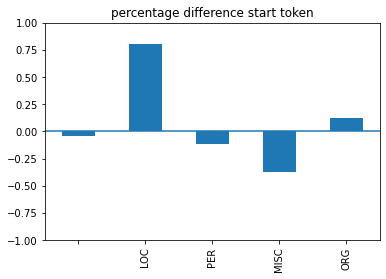

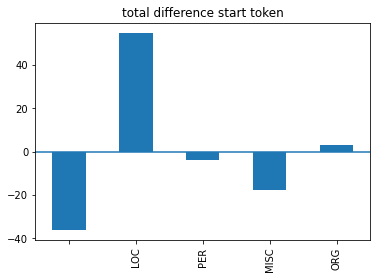

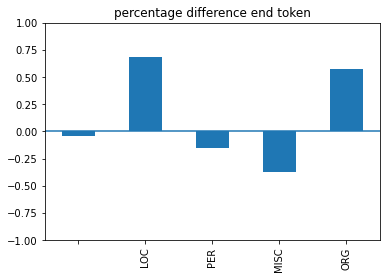

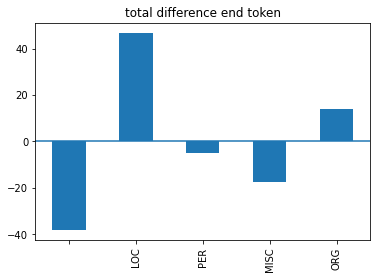

In [49]:
visualize_frequencies(frequencies_df)

## NER on question level

Because of the high amount of different question types, it will not be possible to look at all of them in the given time frame. Therefore only question type groups with more than 100 samples are looked at. This a total of 8 groups. 

Namely: was, wie,  wann, welche, wer, wie viel, welcher, wo

In [28]:
# get question type labels and split data in groups
data_grouped_by_question_type = data_df.groupby('question_type')
list_of_question_types = list(data_grouped_by_question_type.groups.keys())

In [65]:
# calculate entity tags for each question type and save in dict

# dict is old, should be replaced by df
# frequencies_per_question_type_dict = {}

# new df
df_data_list = []

for question_type in list_of_question_types:
    question_type_group_df = data_grouped_by_question_type.get_group(question_type)
    element_count = len(question_type_group_df)
    
    # check if group has enough elements and is not the conflict group
    if element_count > 10 and question_type != 'conflict':
        
        frequencies_df = get_frequencies_as_data_frame_in_comparison_to_expected_frequencies('ner_tag', question_type_group_df, NER_tag_list)
        
        # get all tags and vavlues for start token highlights
        start_token_deviation_from_general = frequencies_df['start token deviation from general']
        
        for tag, value in start_token_deviation_from_general.items():
            
            new_data_point = {
                'question type' : question_type,
                'token type' : 'start_token_highlight',  
                'tag' : tag,
                'percentage difference' : value,
                'total samples available' : element_count
                }
            
            df_data_list.append(new_data_point)
            
        # get all tags and vavlues for end token highlights
        end_token_deviation_from_general = frequencies_df['end token deviation from general']
        
        for tag, value in end_token_deviation_from_general.items():
            
            new_data_point = {
                'question type' : question_type,
                'token type' : 'end_token_highlight',  
                'tag' : tag,
                'percentage difference' : value,
                'total samples available' : element_count
                }
            
            df_data_list.append(new_data_point)

        
        # old
        frequencies_per_question_type_dict[question_type] = frequencies_df
        
overview_df = pd.DataFrame(df_data_list)
overview_df.head(2)



# frequencies_per_question_type_dict['wo'].head(2)

,question type,token type,tag,percentage difference,total samples available
0,undefined,start_token_highlight,,0.002307,25
1,undefined,start_token_highlight,LOC,0.302111,25


In [ ]:
# saving the results in a big dataframe that can be searched for
# columns: tokentype (start or end token), NER-tag, percentage difference, total amount of samples available

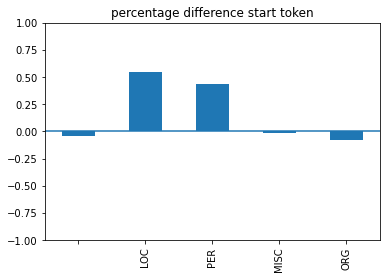

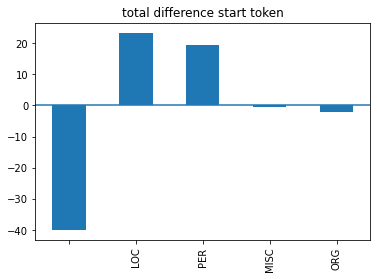

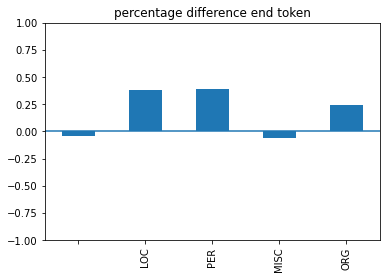

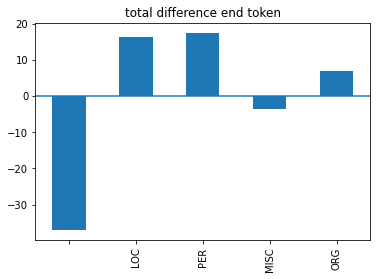

In [56]:
# visualize the results

visualize_frequencies(frequencies_per_question_type_dict['welcher'])

## Notes about oberservations with different groups

### was
No significant looking derivations from expected entity count for every entity
### wie
No significant looking derivations from expected entity count for every entity
### wann
No significant looking derivations from expected entity count for every entity
### welche
increase of over 50% for LOC and ORG, for both start and end token
### wer
increase of over 75% for PER, for both start and end token
### wie viel
No significant looking derivations from expected entity count for every entity
### welcher 

### wo

In [ ]:
list_of_question_types

In [ ]:
# make observations / conclusions

In [70]:
overview_df.sort_values('percentage difference', ascending = False).head(10)

,question type,token type,tag,percentage difference,total samples available
132,wieso,start_token_highlight,PER,1.534999,31
137,wieso,end_token_highlight,PER,1.534999,31
97,wem,end_token_highlight,PER,1.456680,18
107,wer,end_token_highlight,PER,1.147654,188
92,wem,start_token_highlight,PER,1.023148,18
86,welches,end_token_highlight,LOC,1.015690,62
131,wieso,start_token_highlight,LOC,0.955982,31
81,welches,start_token_highlight,LOC,0.924068,62
7,undefined,end_token_highlight,PER,0.856475,25
102,wer,start_token_highlight,PER,0.855250,188
